In [1]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [2]:
pip install --upgrade pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

In [4]:
!python -v 

/bin/bash: line 1: python: command not found


In [5]:
!python3 -V

Python 3.10.6


In [6]:
import sys

In [7]:
sys.version

'3.10.6 (main, Nov  2 2022, 18:53:38) [GCC 11.3.0]'

In [8]:
!python3 -m pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [9]:
import pandas as pd

In [10]:
!python3 -m pip install numpy

Defaulting to user installation because normal site-packages is not writeable


In [11]:
import numpy as np

In [12]:
!python3 -m pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [13]:
import matplotlib.pyplot as plt

In [14]:
!python3 -m pip install CIFAR10

Defaulting to user installation because normal site-packages is not writeable


In [15]:
!python3 -m pip install torchvision

Defaulting to user installation because normal site-packages is not writeable


In [16]:
import matplotlib.pyplot as plt

In [17]:
!python3 -m pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable


In [218]:
from torchvision.datasets.cifar import CIFAR10

In [219]:
from torchvision.transforms import ToTensor

In [220]:
training_data = CIFAR10(root = "./",
                        train = True,
                        download = True,
                        transform = ToTensor())

Files already downloaded and verified


In [221]:
test_data = CIFAR10(root = "./",
                        train = False,
                        download = True,
                        transform = ToTensor())

Files already downloaded and verified


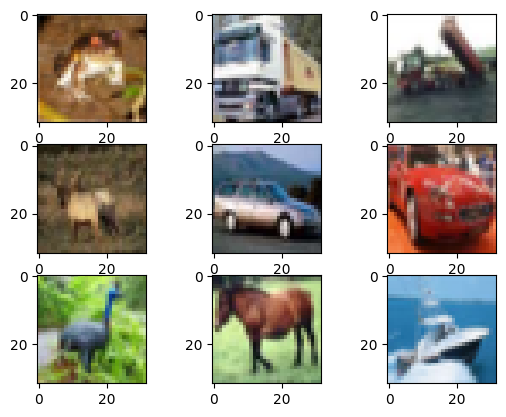

In [222]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(training_data.data[i])
plt.show()

In [223]:
import matplotlib.pyplot as plt

In [224]:
import torchvision.transforms as T

In [225]:
from torchvision.datasets.cifar import CIFAR10

In [226]:
from torchvision.transforms import Compose

In [227]:
from torchvision.transforms import RandomCrop

In [228]:
from torchvision.transforms import RandomHorizontalFlip

In [229]:
transforms = Compose([
    T.ToPILImage(),
    RandomCrop((32, 32), padding = 4),
    RandomHorizontalFlip(p = 0.5),
])

In [230]:
training_data = CIFAR10(
    root = "./",
    train = True,
    download = True,
    transform = transforms ) # transform 에는 데이터를 변환하는 함수가 들어감

Files already downloaded and verified


In [231]:
test_data = CIFAR10(
    root = "./",
    train = False,
    download = True,
    transform = transforms )

Files already downloaded and verified


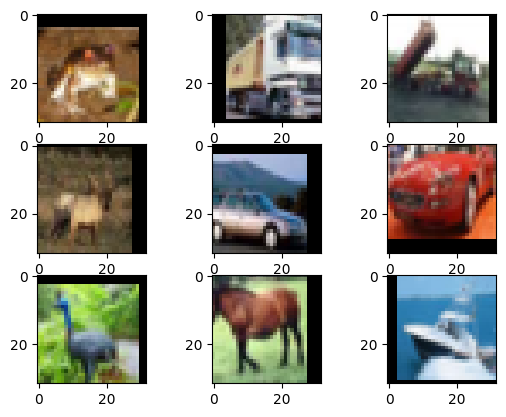

In [232]:
for i in range(9) :
    plt.subplot(3, 3, i+1)
    plt.imshow(transforms(training_data.data[i]))

In [233]:
plt.show()

In [234]:
# 데이터 전처리에 정규화 추가
import matplotlib.pyplot as plt
import torchvision.transforms as T

In [235]:
from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import Compose

In [236]:
from torchvision.transforms import RandomHorizontalFlip, RandomCrop, Normalize

In [237]:
# 데이터 전처리 정의
transforms = Compose ([
    T.ToPILImage(),
    RandomCrop(( 32, 32), padding = 4 ),
    RandomHorizontalFlip(p = 0.5),
    T.ToTensor(),
    
    Normalize(mean = (0.4914, 0.4822, 0.4465), std = (0.247, 0.243, 0.261)),
    T.ToPILImage()
]) 
    

In [238]:
# 학습용 데이터 정의
training_data = CIFAR10(
    root = "./",
    train = True,
    download = True,
    transform = transforms )

# 평가용 데이터 정의

test_data = CIFAR10(
    root = "./",
    train = False,
    download = True,
    transform = transforms )

Files already downloaded and verified
Files already downloaded and verified


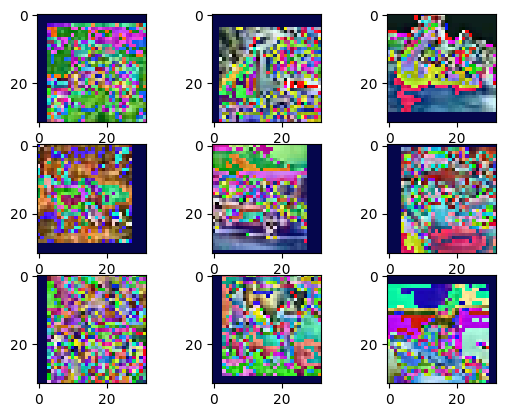

In [239]:
# 이미지 표시
for i in range(9) :
    plt.subplot(3, 3, i+1)
    plt.imshow(transforms(training_data.data[i]))
plt.show()

In [240]:
# 데이터셋의 평균과 표준편차

import torch

training_data = CIFAR10(
    root = "./",
    train = True,
    download = True,
    transform = ToTensor())

Files already downloaded and verified


In [241]:
# item[0]은 이미지, item[1]은 정답레이블
imgs = [item[0] for item in training_data]

In [242]:
# imgs를 하나로 합침
imgs = torch.stack(imgs, dim = 0).numpy()

In [243]:
#rgb 각 평균
mean_r = imgs[:,0,:,:].mean()
mean_g = imgs[:,1,:,:].mean()
mean_b = imgs[:,2,:,:].mean()

print(mean_r, mean_g, mean_b)

0.49139968 0.48215827 0.44653124


In [244]:
#rgb 각 표준편차
std_r = imgs[:,0,:,:].std()
std_g = imgs[:,1,:,:].std()
std_b = imgs[:,2,:,:].std()

print(std_r, std_g, std_b)

0.24703233 0.24348505 0.26158768


In [245]:
## CNN으로 이미지 분류
# VGG 기본 블록 정의
import torch
import torch.nn as nn

class BasicBlock(nn.Module) : # 기본블럭 정의
    # 기본 블록을 구성하는 층 정의
    
    def __init__(self, in_channels, out_channels, hidden_dim) :
        
        #nn.Module 클래스의 요소 상속
        super(BasicBlock, self).__init__()
        
        # 합성곱층의 정의
        self.conv1 = nn.Conv2d(in_channels, hidden_dim,
                               kernel_size = 3, padding = 1)
        self.conv2 = nn.Conv2d(hidden_dim, out_channels,
                               kernel_size = 3, padding = 1)
        
        self.relu = nn.ReLU()
        
        # stride는 커널의 이동거리
        self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)
    def forward(self, x) : # 기본 블록의 순전파 정의
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)

        return x   

In [251]:
# VGG 모델 정의하기

class CNN(nn.Module) : 
    def __init__(self, num_classes) : # num_classes는 클래스 개수
        super(CNN, self).__init__()
        
        # 합성곱 기본 블록 정의
        self.block1 = BasicBlock(in_channels = 3, out_channels = 32, hidden_dim = 16)
        self.block2 = BasicBlock(in_channels = 32, out_channels = 128, hidden_dim = 64)
        self.block3 = BasicBlock(in_channels = 128, out_channels = 256, hidden_dim = 128)
        
        # 분류기 정의
        self.fc1 = nn.Linear(in_features = 4096, out_features = 2048)
        self.fc2 = nn.Linear(in_features = 2048, out_features = 256)
        self.fc3 = nn.Linear(in_features = 256, out_features = num_classes)
        
        # 분류기의 활성화 함수
        self.relu = nn.ReLU()
    def forward(self, x) :
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x) # 출력모양 : (-1, 256, 4, 4)
        x = torch.flatten(x, start_dim = 1) # 2차원 특징맵을 1차원으로

        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)

        return x

In [252]:
!python3 -m pip install DataLoader
!python3 -m pip install adam
!python3 -m pip install torch
!python3 -m pip install Adam
!python3 -m pip install optim

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [253]:
from torch.utils.data.dataloader import DataLoader
from torch.optim.adam import Adam

In [254]:
transforms = Compose([
    RandomCrop((32, 32), padding = 4), # 랜덤 크롭핑
    RandomHorizontalFlip(p = 0.5), # y 축으로 좌우대칭
    ToTensor(), # 텐서로 변환
    
    # 이미지 정규화
    Normalize(mean = (0.4914, 0.4822, 0.4465), std = (0.247, 0.243, 0.261))
])

In [255]:
# 학습용 데이터와 평가용 데이터 불러오기
training_data = CIFAR10(root = "./", train = True, download = True, transform = transforms)
test_data = CIFAR10( root = "./", train = False, download = True, transform = transforms)

# 데이터로더 정의
train_loader = DataLoader(training_data, batch_size = 32, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 32, shuffle = False)

# 학습을 진행할 프로세서 설정
device = "cuda" if torch.cuda.is_available() else "cpu"

# CNN 모델 정의
model = CNN(num_classes = 10)

# 모델을 device로 보냄
model.to(device)       

Files already downloaded and verified
Files already downloaded and verified


CNN(
  (block1): BasicBlock(
    (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): BasicBlock(
    (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block3): BasicBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=4096, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=256,

In [ ]:
lr = 1e-3

optim = Adam(model.parameters(), lr = lr)

# 학습루프 정의
for epoch in range(100) :
    for data, label in train_loader : # 데이터 호출
        optim.zero_grad() # 기울기 초기화
        
        preds = model(data.to(device)) # 모델의 예측
        
        # 오차역전파와 최적화
        
        loss = nn.CrossEntropyLoss()(preds, label.to(device))
        loss.backward()
        optim.step()
    
    if epoch == 0 or epoch%10==9: #10번마다 손실 출력
        print(f"epoch{epoch+1} loss:{loss.item()}")
        
# 모델 저장
torch.save(model.state_dict(), "CIFAR.pth") 


# 모델 성능확인

model.loader_state_dict(torch.load("CIFAR.pth", map_location = device ))

num_corr = 0

with torch.no_grad() :
    for data, lavel in test_loader :
        
        output = model(data.to(device))
        
        preds = output.data.max(1)[1]
        
        corr = preds.eq(lavel.to(device).data).sum().item()
        num_corr += corr
    
    print(f"Accuracy : {num_corr/len(test_data)} ")
    

epoch1 loss:0.17604412138462067
epoch10 loss:0.2726002037525177
epoch20 loss:0.2662718594074249
epoch30 loss:0.32301971316337585
epoch40 loss:0.5462402701377869
epoch50 loss:0.7229148745536804


In [ ]:
# 사전학습된 모델 준비
import torch
import torch.nn as nn

In [ ]:
from torchvision.models.vgg import vgg16

In [ ]:
device = "cuda" if torch.cuda.is_avilable() else "cpu"

model = vgg16(pretrained = True) # vgg16 모델 객체 생성
fc = nn.Sequential( # 분류층 정의
        nn.Linear(512 * 7* 7, 4096),
        nn.ReLu(),
        nn.Dropout(), # 드롭아웃층 정의
        nn.Linear(4096, 4096),
        nn.ReLu(),
        nn.Dropout(),
        nn.Linear(4096, 10),
    )

model.classifier = fc
mode.to(device)

In [129]:
!python3 -m pip install tqdm

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import tqdm

In [ ]:
from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import Compose, ToTensor, Resize
from torchvision.transforms import Compose, RandomHorizontalFlip, RandomCrop, Normalize
from torch.utils.data.dataloader import DataLoader

from torch.optim.adam import Adam

In [ ]:
transforms = Compose ([
    Resize(224),
    RandomCrop((224, 224), padding = 4),
    RandomHorizontalFlip(p=0.5),
    ToTensor(),
    Normalize(mean = (0.4914, 0.1822, 0.4465), std = (0.247, 0.243, 0.261))
])

In [ ]:
training_data = CIFAR10(root = "./", train = True, download = True, transform = transforms)
test_data = CIFAR10(root = "./", train = False, download = True, transform = transforms)

In [ ]:
# 학습루프 정의
lr = 1e-4
optim = Adam(model.parameters(), lr = lr)

for epoch in range(30) :
    iterator = tqdm.tqdm(train_loader) #학습 로그 출력
    for data, lavel in iterator :
        optim.zero_grad()
        
        preds = model(data.to(device)) # 모델의 예측값 출력
        
        loss = CrossEntroppyLoss()(preds, label.to(device))
        loss.backward()
        optim.step()
        
        # tqdm이 출력할 문자열
        iterator.set_description(f"epoch:{epoch:{epoch+1} loss:{loss.item()}")

torch.save(model.state_dict(), "CIFAR_pretrained.pth") # 모델 저장

In [ ]:
# 모델 성능 평가(확인)하기
model.load_state_dict(torch.load("CIFAR_pretrained.pth", map_location = device))

num_corr = 0

with torch.no_grad() :
    for data, lavel in test_loader :
        
        output = model(data.to(device))
        preds = output.data.max(1)[1]
        corr = preds.eq(label.to(device).data).sum().item()
        num_cor += corr
        
    print(f"Accuracy : {num_corr / lrn(test_data)}")